[[ 3.76182859e+00 -1.55562872e+00]
 [ 1.92062728e+00 -1.02302088e+01]
 [-5.96993695e+00  9.04490392e+00]
 [-1.78193960e-01 -7.99693225e+00]
 [ 3.93271556e+00 -1.06298380e+00]
 [ 6.09978085e+00 -1.98611890e-01]
 [-4.50631246e+00  9.22225910e+00]
 [ 6.63641861e+00  3.15485496e-01]
 [ 4.33698999e+00  4.30967117e-01]
 [ 3.88055900e+00 -1.94631201e+00]
 [ 6.44359080e+00 -1.53997606e+00]
 [ 5.14040460e+00 -1.86013952e+00]
 [ 8.77726192e-01 -1.01180548e+01]
 [-6.58515503e+00  1.03055167e+01]
 [-4.33165641e+00  8.60204747e+00]
 [-7.92141011e+00 -7.42561220e+00]
 [-5.65532077e+00  7.96897665e+00]
 [-8.91440062e+00 -9.38666795e+00]
 [ 7.68432617e-01 -7.73768943e+00]
 [ 8.24501926e-01 -8.52021557e+00]
 [-4.84224039e+00  8.78664564e+00]
 [-5.72450937e+00  9.53095438e+00]
 [-3.82763495e+00  9.88261709e+00]
 [-9.73116840e+00 -7.30453334e+00]
 [-5.58461343e+00 -8.85427025e+00]
 [ 6.09793278e+00 -6.22326183e-01]
 [ 2.69242151e+00 -1.35641009e+00]
 [ 3.89990296e-01 -1.05217735e+01]
 [ 2.42975758e+00 -8

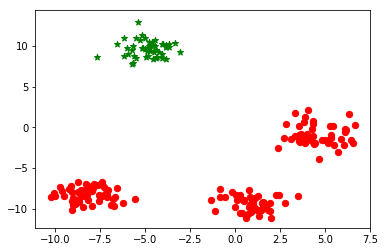

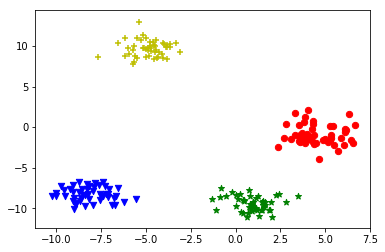

[[ 1.88200999  0.1996409 ]
 [ 2.19222692  0.31374485]
 [ 0.46684704  1.06446265]
 ...
 [-0.41573938  0.69584814]
 [ 0.37733287  0.92954738]
 [ 0.29619047 -0.17017713]]


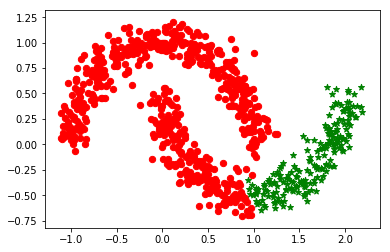

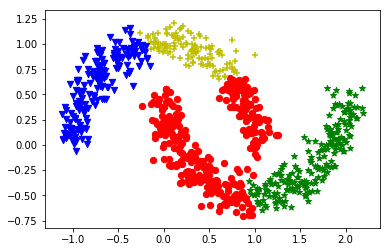

[[-0.90224255 -0.75622444]
 [ 0.41466502  0.17111079]
 [ 0.02972041  0.97453691]
 ...
 [-0.99985655  0.23586576]
 [-0.04185383 -0.47203221]
 [-0.29227904  0.41815671]]


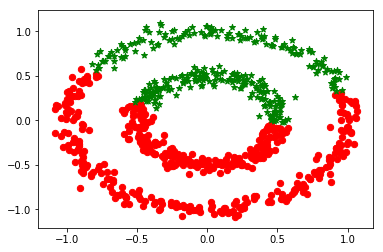

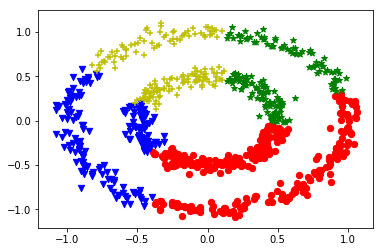

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

def AgglomerativeTest(n_clusters):
    assert 1 <= n_clusters <= 4
    predictResult = AgglomerativeClustering(n_clusters=n_clusters,
                                            affinity='euclidean',
                                            linkage='ward').fit_predict(data)
    # 定义绘制散点图时使用的颜色和散点符号
    colors = 'rgby'
    markers = 'o*v+'
    # 依次使用不同的颜色和符号绘制每个类的散点图
    for i in range(n_clusters):
        subData = data[predictResult==i]
        # 根据 n_clusters的值，决定要分多少种颜色和maker
        plt.scatter(subData[:,0], subData[:,1], c=colors[i], marker=markers[i], s=40)
    # 通过绘制图形把分层的结果输出出来
    plt.show()

# 生成随机数据，200个点，分成4类，返回样本及标签
data, labels = make_blobs(n_samples=200, centers=4)
print(data)
AgglomerativeTest(2)
AgglomerativeTest(4)

# 生成随机数据，800个点，月牙形单标签数据集，返回样本及标签
data, labels = make_moons(n_samples=800,noise=0.1)
print(data)
AgglomerativeTest(2)
AgglomerativeTest(4)

# 生成随机数据，800个点，环状二分类单标签数据集，返回样本及标签
data, labels = make_circles(n_samples=800,noise=0.05,factor=0.5)
print(data)
AgglomerativeTest(2)
AgglomerativeTest(4)

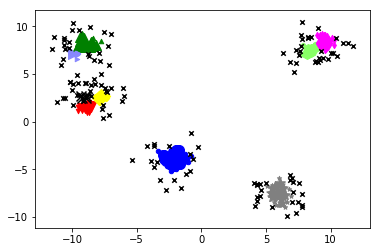

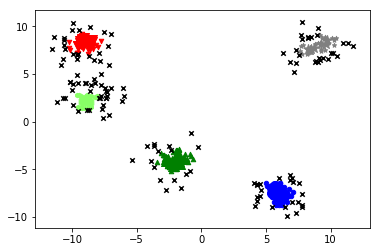

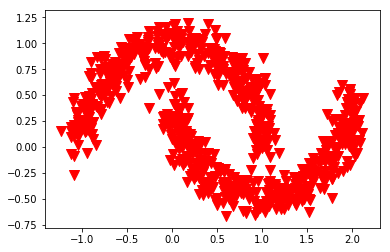

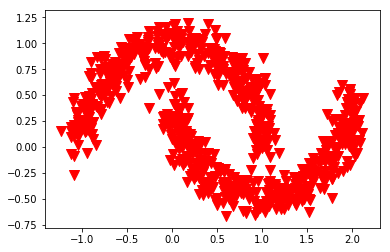

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

def DBSCANtest(data, eps=0.6, min_samples=8):
    # 聚类
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(data)
        
    # 聚类标签（数组，表示每个样本所属聚类）和所有聚类的数量
    # 标签-1对应的样本表示噪点
    clusterLabels = db.labels_
    uniqueClusterLabels = set(clusterLabels)
    # 标记核心对象对应下标为True
    coreSamplesMask = np.zeros_like(db.labels_, dtype=bool)
    coreSamplesMask[db.core_sample_indices_] = True

    # 绘制聚类结果
    colors = ['red', 'green', 'blue', 'gray', '#88ff66',
              '#ff00ff', '#ffff00', '#8888ff', 'black',]
    markers = ['v', '^', 'o', '*', 'h', 'd', 'D', '>', 'x']
    for label in uniqueClusterLabels:
        # 使用最后一种颜色和符号绘制噪声样本
        # clusterIndex是个True/False数组
        # 其中True表示对应样本为cluster类
        clusterIndex = (clusterLabels==label)
        
        # 绘制核心对象
        coreSamples = data[clusterIndex&coreSamplesMask]
        plt.scatter(coreSamples[:, 0], coreSamples[:, 1],
                    c=colors[label], marker=markers[label], s=100)

        # 绘制非核心对象
        nonCoreSamples = data[clusterIndex & ~coreSamplesMask]
        plt.scatter(nonCoreSamples[:, 0], nonCoreSamples[:, 1],
                    c=colors[label], marker=markers[label], s=20)
    plt.show()

data, labels = make_blobs(n_samples=300, centers=5)
DBSCANtest(data)
DBSCANtest(data, 0.8, 15)
